In [194]:
from IPython.core.display import HTML
def css_styling():
    styles = open("custom.css", "r").read()
    return HTML(styles)
css_styling()

# Simulation for estimating the value of $\pi$

In this simulation we are going to estimate the value of $\pi$.

For this, consider a circle of radius $R$ inside a square of length $L = 2R$, as in the image below.

![](circle_inside_square.jpg)

Now imagine we start filling this square with random points. Some of these points will fall inside the circle (let's call this number $n_{circle}$), some of them not. At some point, as the number of points increases, the area of the circle will be proportional to the number of points inside it, i.e., 
$$n_{circle} \propto A_{circle} = \pi R^2 \, ,$$
so
$$n_{circle} = aA_{circle} = a\pi R^2 \, ,$$
where $a$ is a proportionality constant.

The same will be true for the square, in which its area will be proportional to the total number of points, $n_{total}$, that is,
$$n_{total} \propto A_{square} = L^2 = 4R^2 \, ,$$
so
$$n_{total} = bA_{square} = bL^2 = 4bR^2 \, ,$$
where $b$ is a proportionality constant.

Assuming the points are uniformly distributed (which will be true as $n_{total} \to \infty$), then the density of points will be the same everywhere, and the proportionality constants $a$ and $b$ will be the same. Therefore, we have
$$\frac{n_{circle}}{n_{total}} = \frac{a\pi R^2}{4aR^2} = \frac{\pi}{4}$$

$$\therefore \pi = \frac{4n_{circle}}{n_{total}} \, ,$$
which is what we are going to calculate here.

In [195]:
# Importing libraries

from matplotlib import pyplot as plt
import numpy as np
import random
import scipy.stats as stats
import math
import multiprocessing as mp
from IPython.display import display, Math

# Checking if $a$ is really equal to $b$ as $n_{total} \to \infty$

We will first check that the difference between the proportionality constants $a$ and $b$ approach zero as the number of points increase.

In [196]:
def check_prop_consts(n):
    i = 0
    radius = 1
    inside = 0
    outside = 0
    while i < n:
        x = random.uniform(-radius,radius)
        y = random.uniform(-radius,radius)
        if math.sqrt(x*x + y*y) <= radius:
            inside += 1
        else:
            outside += 1
        i += 1
    a = round(math.pi*radius*radius/inside,6)
    b = round(4*radius*radius/(inside + outside),6)
    return a, b

In [205]:
for n in [100, 1000, 10000, 50000]:
    a, b = check_prop_consts(n)
    delta = round(abs(a-b),6)
    print('n = {};\ta = {}\t; b = {};\t |a-b| = {}'.format(n, a, b, delta))

n = 100;	a = 0.043036	; b = 0.04;	 |a-b| = 0.003036
n = 1000;	a = 0.003942	; b = 0.004;	 |a-b| = 5.8e-05
n = 10000;	a = 0.0004	; b = 0.0004;	 |a-b| = 0.0
n = 50000;	a = 8e-05	; b = 8e-05;	 |a-b| = 0.0


# Calculating the value of $\pi$

In [206]:
def calculate_pi(n):
    i = 0
    radius = 1
    inside = 0
    while i < n:
        x = random.uniform(-radius,radius)
        y = random.uniform(-radius,radius)
        if math.sqrt(x*x + y*y) <= radius:
            inside += 1
        i += 1
    return 4*inside/n

We will run in parallel here to increase the number of points in the calculation and, therefore, increase the accuracy.

You can test different numbers of $n$ if you want.

In [207]:
n = 20000

threads = mp.cpu_count() 
pool = mp.Pool(threads)
pi = pool.map(calculate_pi, [n for x in range(threads)])
pi = round(np.mean(pi),4)
pi

3.1342

# Calculating average $\pi$

By running the code above, we can observe that the value of $\pi$ varies in each run. Therefore, to obtain an average value of $\pi$, we run the code above multiple times.

In [208]:
n = 10000
threads = mp.cpu_count() 

pool = mp.Pool(threads)
all_pi = []
for i in range(100):
    pi = pool.map(calculate_pi, [n for x in range(threads)])
    all_pi.append(pi)
pool.close()
pi = round(np.mean(all_pi),4)
std = round(np.std(all_pi),4)

display(Math('\pi = {} \pm {}'.format(pi, std)))

<IPython.core.display.Math object>

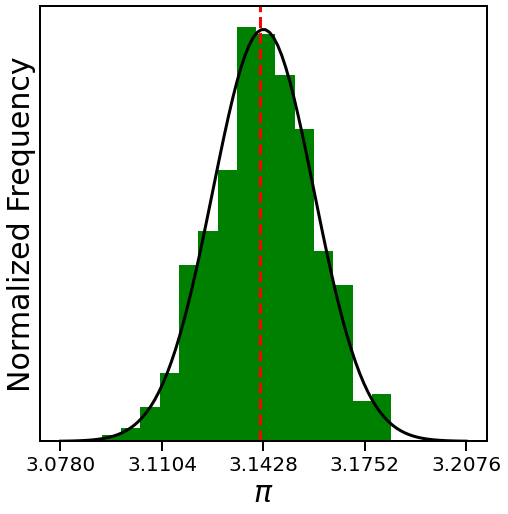

In [276]:
all_pi = np.array(all_pi)
all_pi = all_pi.reshape(all_pi.size,1)

d = 4

x = np.linspace(pi - d*std, pi + d*std, 100)
pdf = stats.norm.pdf(x, pi, std)

plt.figure(figsize=(8,8))
plt.plot(x, pdf, color='k', lw=3)
plt.hist(all_pi, bins=15, density=True, alpha=1, color='g')
plt.axvline(x=math.pi,ls='--',lw=3,color='r')

plt.xticks(np.linspace(x.min(),x.max(),5), fontsize=20)
plt.yticks([])
plt.ylabel('Normalized Frequency', fontsize=30)
plt.xlabel('$\pi$', fontsize=30)
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2

plt.show()